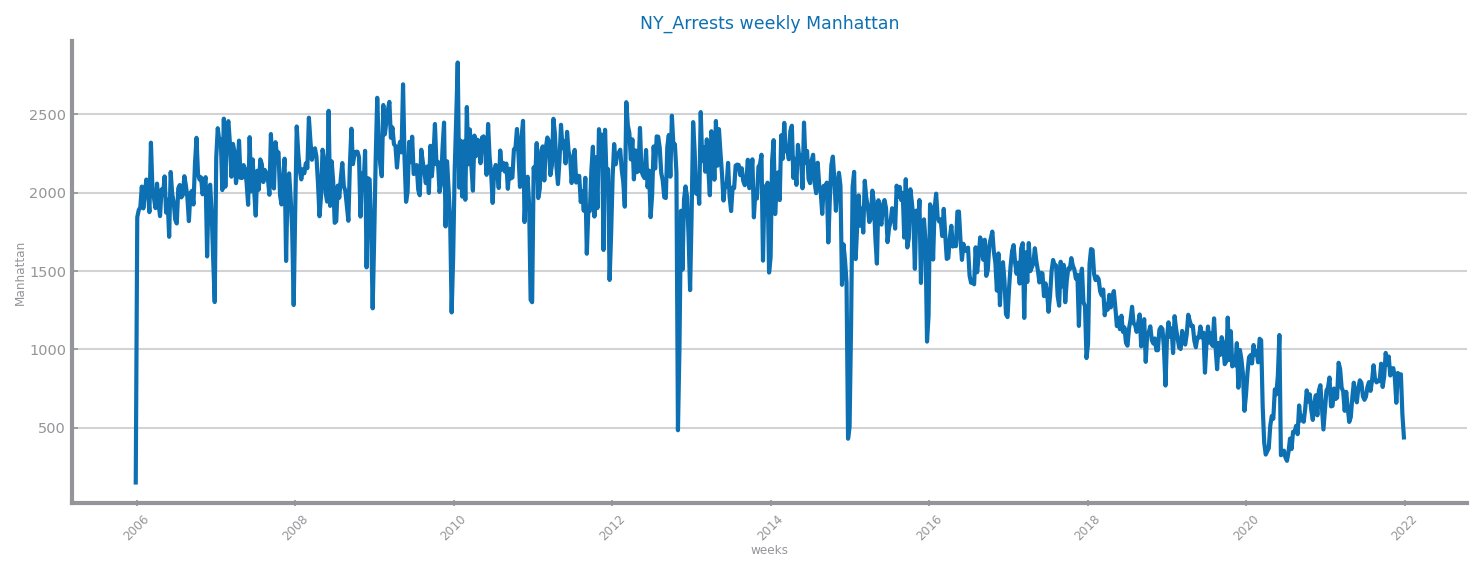

In [1]:
from numpy import sum
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

# File details
file_tag = "NY_Arrests"
filename = "/Users/pascalludwig/Documents/Master/Semester 1/Term 2/Data Science/Project/DataScience/Projeto/TimeSeries/forecast_ny_arrests.csv"
index = "Date"
target = "Manhattan"

# Load the dataset
data: DataFrame = read_csv(
    filename,
    sep=";",  # Semicolon-separated values
    decimal=".",  # Use period for decimal
    parse_dates=[index],  # Parse the Date column
    infer_datetime_format=True,
)
data.set_index(index, inplace=True)

# Weekly aggregation
series: Series = data[target]
ss_weeks: Series = ts_aggregation_by(series, gran_level="W", agg_func=sum)

# Plot weekly aggregated data
figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel="weeks",
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)
show()


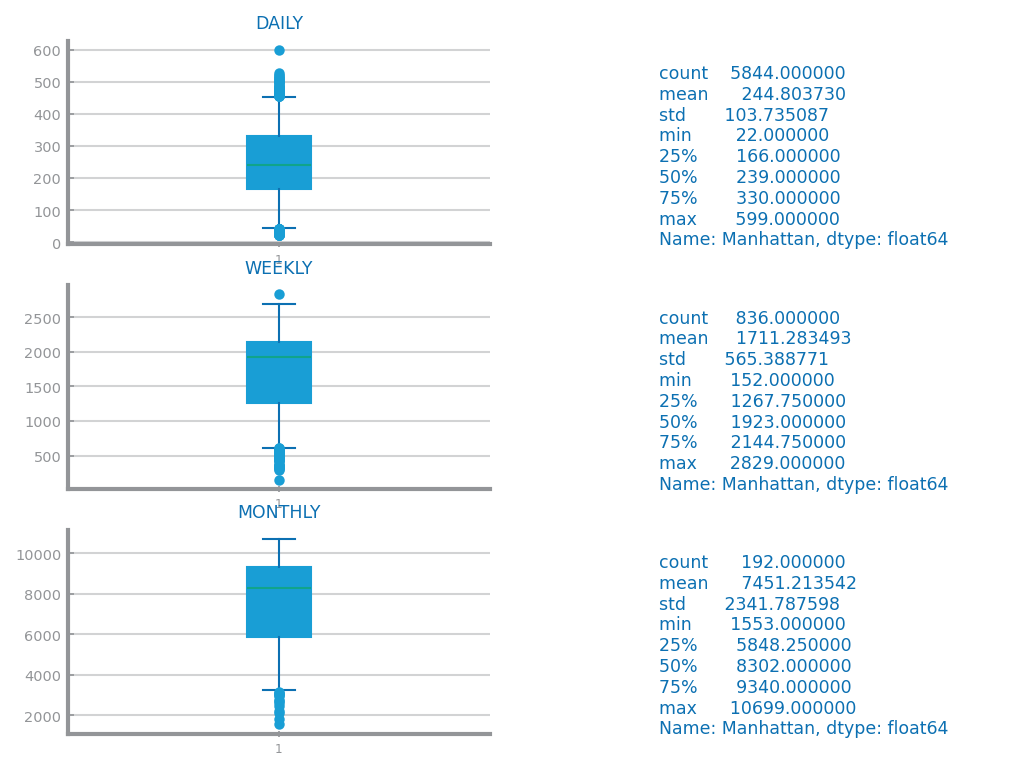

In [6]:
from numpy import array
from matplotlib.pyplot import show, subplots
from matplotlib.figure import Figure
from dslabs_functions import set_chart_labels

# **Weekly and Monthly Aggregations**
ss_weeks = series.resample("W").sum()  # Resample to weekly sums
ss_months = series.resample("M").sum()  # Resample to monthly sums

# Create subplots for boxplots and descriptive statistics
fig: Figure
axs: array
fig, axs = subplots(3, 2, figsize=(2 * HEIGHT, 1.5 * HEIGHT))  # Adjusted for 3 rows

# **Boxplots**
set_chart_labels(axs[0, 0], title="DAILY")
axs[0, 0].boxplot(series)
set_chart_labels(axs[1, 0], title="WEEKLY")
axs[1, 0].boxplot(ss_weeks)
set_chart_labels(axs[2, 0], title="MONTHLY")
axs[2, 0].boxplot(ss_months)

# **Descriptive Statistics**
# Daily statistics
axs[0, 1].grid(False)
axs[0, 1].set_axis_off()
axs[0, 1].text(0.2, 0, str(series.describe()), fontsize="small")

# Weekly statistics
axs[1, 1].grid(False)
axs[1, 1].set_axis_off()
axs[1, 1].text(0.2, 0, str(ss_weeks.describe()), fontsize="small")

# Monthly statistics
axs[2, 1].grid(False)
axs[2, 1].set_axis_off()
axs[2, 1].text(0.2, 0, str(ss_months.describe()), fontsize="small")

# Show the plots
show()


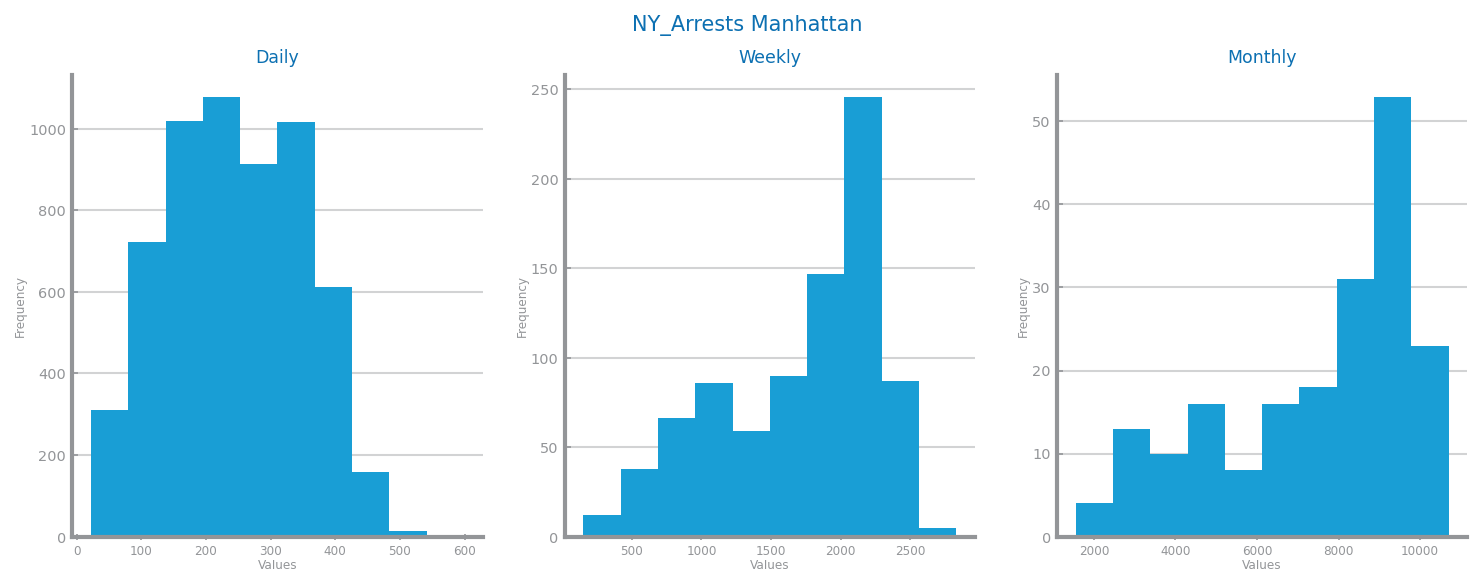

In [7]:
from matplotlib.pyplot import subplots, show
from matplotlib.figure import Figure
from numpy import array
from dslabs_functions import set_chart_labels, HEIGHT

# Aggregations
ss_days = series  # No aggregation needed; series is already daily
ss_weeks = series.resample("W").sum()  # Resample to weekly sums
ss_months = series.resample("M").sum()  # Resample to monthly sums

# Prepare granularities and names
grans: list[Series] = [ss_days, ss_weeks, ss_months]
gran_names: list[str] = ["Daily", "Weekly", "Monthly"]

# Create subplots for histograms
fig: Figure
axs: array
fig, axs = subplots(1, len(grans), figsize=(len(grans) * HEIGHT, HEIGHT))
fig.suptitle(f"{file_tag} {target}")

# Plot histograms for each granularity
for i in range(len(grans)):
    set_chart_labels(axs[i], title=f"{gran_names[i]}", xlabel="Values", ylabel="Frequency")
    axs[i].hist(grans[i].values)

# Show histograms
show()


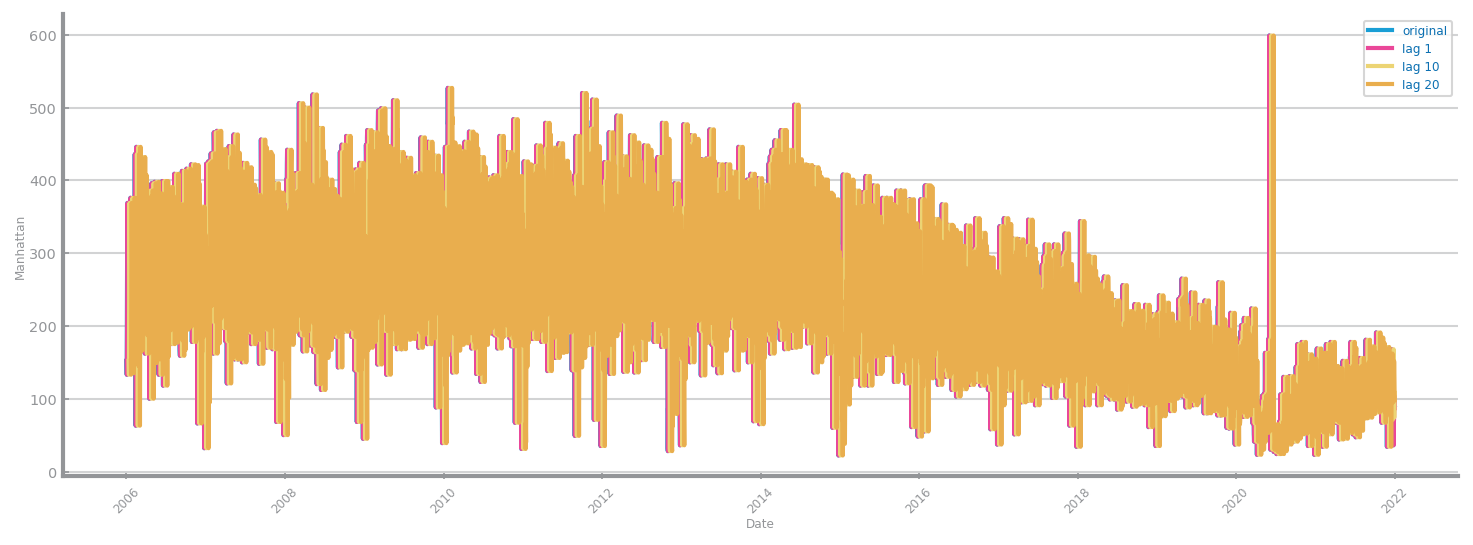

In [4]:
from dslabs_functions import plot_multiline_chart


def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    lagged_series: dict = {"original": series, "lag 1": series.shift(1)}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i)
    return lagged_series


# Plot lagged series
figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, xlabel=index, ylabel=target)
show()


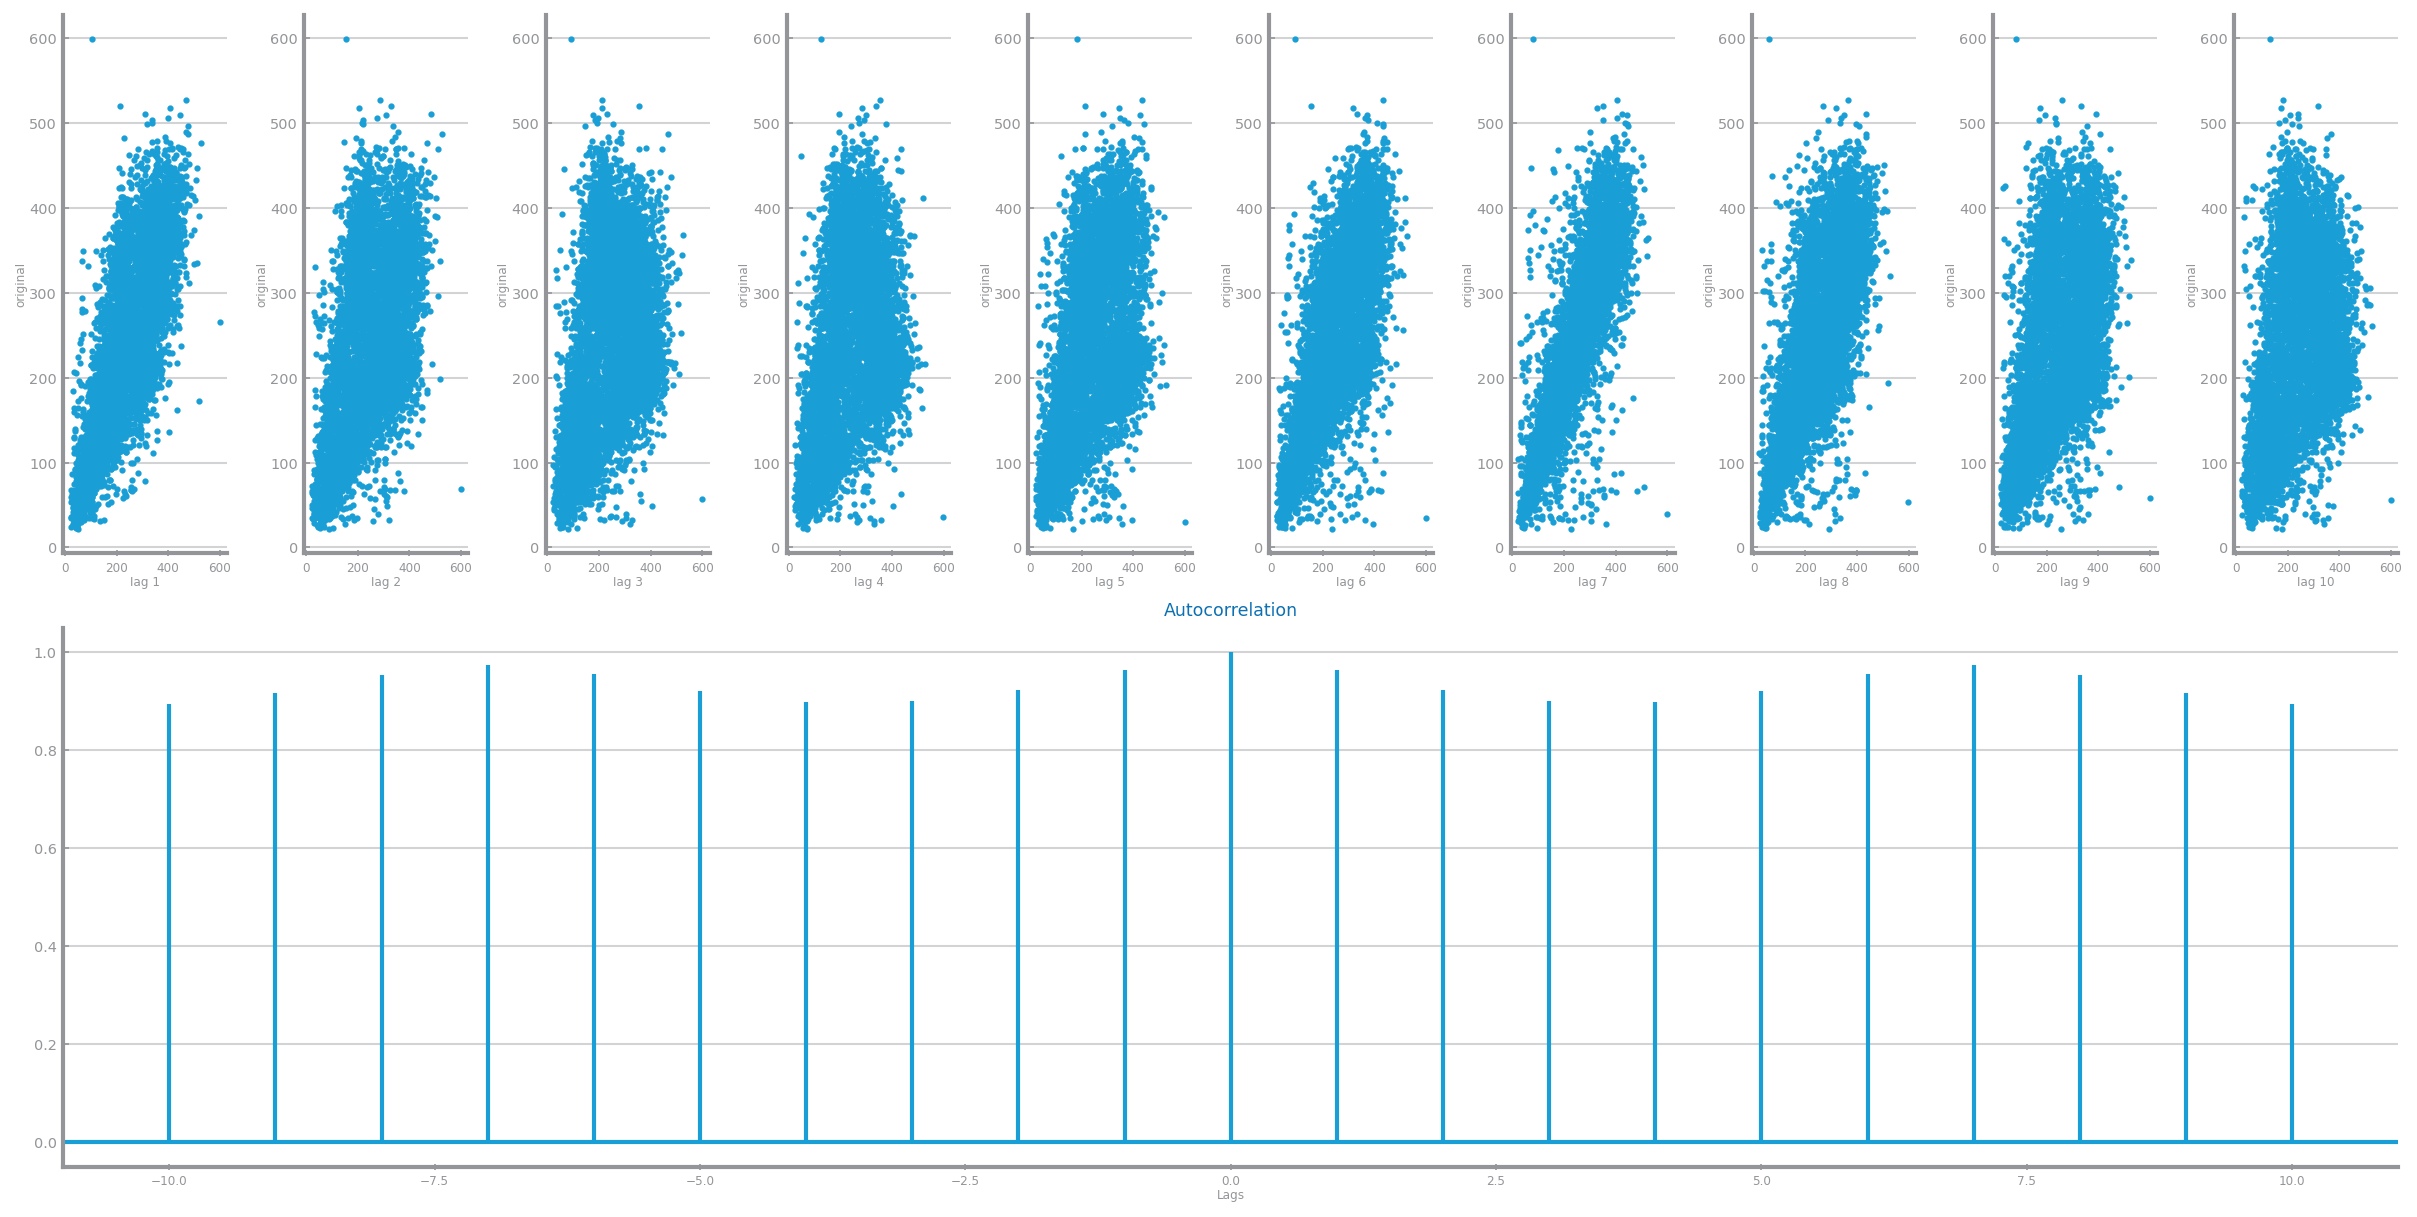

In [5]:
from matplotlib.pyplot import figure
from matplotlib.gridspec import GridSpec


def autocorrelation_study(series: Series, max_lag: int, delta: int = 1):
    k: int = int(max_lag / delta)
    fig = figure(figsize=(4 * HEIGHT, 2 * HEIGHT), constrained_layout=True)
    gs = GridSpec(2, k, figure=fig)

    series_values: list = series.tolist()
    for i in range(1, k + 1):
        ax = fig.add_subplot(gs[0, i - 1])
        lag = i * delta
        ax.scatter(series.shift(lag).tolist(), series_values)
        ax.set_xlabel(f"lag {lag}")
        ax.set_ylabel("original")
    ax = fig.add_subplot(gs[1, :])
    ax.acorr(series, maxlags=max_lag)
    ax.set_title("Autocorrelation")
    ax.set_xlabel("Lags")
    return


# Perform autocorrelation study
autocorrelation_study(series, 10, 1)
